# Data Wrangling: WeRateDogs

In [1]:
#importing important libraries
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt

## Data Gathering

In [2]:
 #Supplied file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Using request library to download the url
with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(image_predictions.content)

In [5]:
# Reading image predictions
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

Since I don't have accces to twitter, I got this code from udacity Twitter API

In [6]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
#Reading the text file line by line
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        #getting the necessary columns
        df_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
       
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


# Data Assesing

### -twitter_archive

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#Checking if there is a duplicated tweet id
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Buddy          7
Daisy          7
Bailey         7
Jax            6
Leo            6
Oscar          6
Milo           6
Stanley        6
Jack           6
Koda           6
Bella          6
Rusty          6
Dave           6
Scout          6
Larry          5
            ... 
Jiminus        1
Flash          1
Aqua           1
Adele          1
Augie          1
Grizz          1
Sprout         1
Kanu           1
Spanky         1
Jo             1
Perry          1
Chaz           1
Horace         1
Gustav         1
Devón          1
Cupid          1
Cheryl         1
Dixie          1
Travis         1
Timmy          1
Baron          1
Bloo           1
Leonard        1
Cilantro       1
Chadrick       1
Lipton         1
Miley          1
Karll         

### -image_predictions

In [16]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## -df_tweet

In [19]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
df_tweet.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [21]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Quality issues

#### twitter_archive
- dropping retweets because we only want the original ratings

- timestamp need to be datetime variable

- the numerator and denominator columns have invalid values
- replies are included in the data
- remove tweets without expanded_urls (tweets without images)
- some names are not names

#### image_predictions
- convert p1,p2,p3 to category
- change every column with 'p' like p1,p2... to prediction1, prediction2...
- there is missing data, 2075 instead of 2356

#### df_tweet
- missing data 2354 instead of 2356

## Tidiness
- doggo, floofer, pupper, puppo columns all refer to one variable (dog stage)
- join df_tweet and image_predictions to twiiter_archive

# Data Cleaning

In [23]:
#copy the dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
df_tweet_clean = df_tweet.copy

#### Define
We want to have the original rating

#### Code

In [24]:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

#### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


#### Define 
timestamp need to be datetime variable

#### Code

In [26]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.8+ KB


#### Define
the numerator and denominator columns have invalid values

#### Code

In [28]:
#Excluding extreme values and zeros
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] != 0 ]
twitter_archive = twitter_archive[twitter_archive['rating_denominator'] >= 10 ]
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] <= 20 ]
twitter_archive = twitter_archive[twitter_archive['rating_denominator'] < 20 ]

#### Test

In [29]:
len(twitter_archive[twitter_archive['rating_numerator']>20])

0

In [30]:
len(twitter_archive[twitter_archive['rating_denominator']>20])

0

In [31]:
len(twitter_archive[twitter_archive['rating_denominator']<10])

0

#### Define
replies are included in the data, it is unnecessary

#### Code

In [32]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


#### Define
Removing the tweets with the expanded_urls (tweets without images)

#### Code

In [34]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


#### Define
some names are not names

#### Code

In [36]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+','None' , regex=True )

In [37]:
#Dropping rows that contain none
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'None']

#### Test

In [38]:
twitter_archive_clean['name'].value_counts()

Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
Buddy         7
Toby          7
Bailey        7
Daisy         7
Stanley       6
Rusty         6
Milo          6
Jack          6
Jax           6
Scout         6
Koda          6
Oscar         6
Dave          6
Bella         6
Leo           6
Gus           5
Finn          5
George        5
Alfie         5
Louis         5
             ..
Flash         1
Aqua          1
Adele         1
Augie         1
Goliath       1
Holly         1
Sprout        1
Strudel       1
Spanky        1
Mingus        1
Jo            1
Perry         1
Chaz          1
Horace        1
Gustav        1
Devón         1
Cupid         1
Dixie         1
Travis        1
Kanu          1
Baron         1
Bloo          1
Leonard       1
Cilantro      1
Chadrick      1
Lipton        1
Karll         1
Grizzwald     1
Timmy         1
Dot           1
Name: name, Length: 931,

#### Define
convert p1,p2,p3 to category

#### Code

In [39]:
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')
image_predictions_clean.p2 = image_predictions_clean.p2.astype('category')
image_predictions_clean.p3 = image_predictions_clean.p3.astype('category')

#### Test

In [40]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


#### Define
change every column with 'p' like p1,p2... to prediction1, prediction2...

#### Code

In [41]:
image_predictions_clean.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)
image_predictions_clean.rename(columns={'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)
image_predictions_clean.rename(columns={'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)
image_predictions_clean.rename(columns={'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

#### Test

In [42]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null category
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null category
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null category
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


#### Define
doggo, floofer, pupper, puppo columns all refer to one variable (dog stage)

#### Code

In [43]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [44]:
twitter_archive_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].sample(15)

,dog_stage,doggo,floofer,pupper,puppo
374,NaN,None,None,None,None
644,NaN,None,None,None,None
1589,pupper,None,None,pupper,None
938,NaN,None,None,None,None
61,NaN,None,None,None,None
489,doggo,doggo,None,None,None
672,pupper,None,None,pupper,None
1055,NaN,None,None,None,None
27,NaN,None,None,None,None
1619,NaN,None,None,None,None


In [45]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [46]:
twitter_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
11,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


#### Define
merge the datasets together

#### Code

In [47]:
dogs_tweets= pd.merge(left=twitter_archive_clean,
                                 right=df_tweet, left_on='tweet_id', right_on='tweet_id', how='inner')

In [48]:
dogs_tweets = dogs_tweets.merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [49]:
dogs_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1395
Data columns (total 22 columns):
tweet_id              1396 non-null int64
timestamp             1396 non-null datetime64[ns]
source                1396 non-null object
text                  1396 non-null object
expanded_urls         1396 non-null object
rating_numerator      1396 non-null int64
rating_denominator    1396 non-null int64
name                  1396 non-null object
dog_stage             186 non-null object
retweet_count         1396 non-null int64
favorite_count        1396 non-null int64
jpg_url               1396 non-null object
img_num               1396 non-null int64
Prediction1           1396 non-null category
Prediction1_conf      1396 non-null float64
Prediction1_dog       1396 non-null bool
Prediction2           1396 non-null category
Prediction2_conf      1396 non-null float64
Prediction2_dog       1396 non-null bool
Prediction3           1396 non-null category
Prediction3_conf      1396 n

# Storing, Analyzing, and Visualizing Data

In [50]:
#Storing the new dogs_tweets to a csv file
dogs_tweets.to_csv('twitter_archive_master.csv', encoding= 'utf-8', index=False)

In [51]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,Prediction1,Prediction1_conf,Prediction1_dog,Prediction2,Prediction2_conf,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 22 columns):
tweet_id              1396 non-null int64
timestamp             1396 non-null object
source                1396 non-null object
text                  1396 non-null object
expanded_urls         1396 non-null object
rating_numerator      1396 non-null int64
rating_denominator    1396 non-null int64
name                  1396 non-null object
dog_stage             186 non-null object
retweet_count         1396 non-null int64
favorite_count        1396 non-null int64
jpg_url               1396 non-null object
img_num               1396 non-null int64
Prediction1           1396 non-null object
Prediction1_conf      1396 non-null float64
Prediction1_dog       1396 non-null bool
Prediction2           1396 non-null object
Prediction2_conf      1396 non-null float64
Prediction2_dog       1396 non-null bool
Prediction3           1396 non-null object
Prediction3_conf      1396 non-null float6

###### Checking the most common dog name

In [53]:
dogs_tweets['name'].value_counts()

Charlie      11
Tucker       10
Cooper       10
Lucy         10
Penny        10
Oliver       10
Sadie         8
Bo            8
Winston       8
Lola          8
Daisy         7
Toby          7
Scout         6
Stanley       6
Koda          6
Milo          6
Rusty         6
Bailey        6
Jax           6
Bella         6
Dave          6
Alfie         5
Leo           5
Larry         5
Buddy         5
Oscar         5
Chester       5
Louis         5
Oakley        4
Clark         4
             ..
Flash         1
Aqua          1
Adele         1
Augie         1
Goliath       1
Grizz         1
Kanu          1
Strudel       1
Spanky        1
Mingus        1
Jo            1
Perry         1
Chaz          1
Horace        1
Gustav        1
Devón         1
Cupid         1
Dixie         1
Travis        1
Timmy         1
Edd           1
Baron         1
Bloo          1
Leonard       1
Cilantro      1
Chadrick      1
Lipton        1
Karll         1
Grizzwald     1
Dot           1
Name: name, Length: 913,

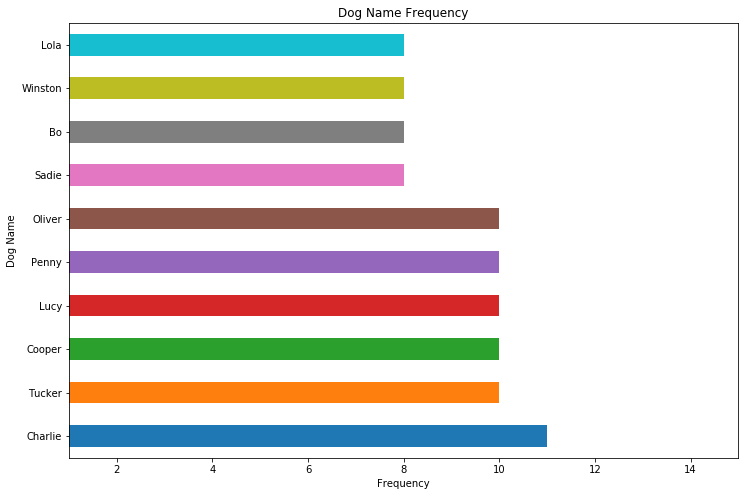

In [54]:
plt.figure(figsize=(12, 8))
dog_names = dogs_tweets.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 15);

The most common dog name is charlie.

#### Checking the highest frequency of ratings

Text(0.5,1,'Ratings Distribution')

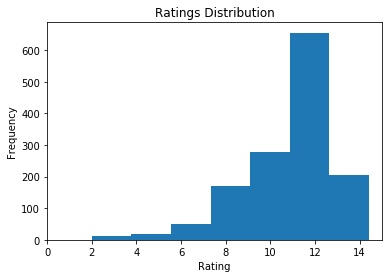

In [59]:
plt.hist(x = df.rating_numerator, bins = 1000)
plt.xlim(0,15)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

The highest frequency of ratings is approximatley 700

##### Investigating in the correlation between retweet_count and favourite_count

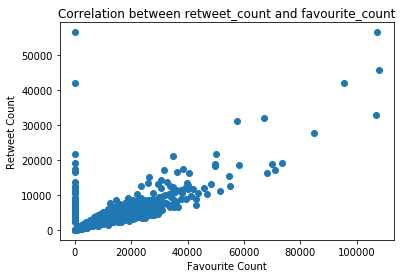

In [56]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(dogs_tweets.favorite_count,
           dogs_tweets.retweet_count)

plt.xlabel('Favourite Count')
plt.ylabel('Retweet Count')
plt.title("Correlation between retweet_count and favourite_count");

As shown there is a positive correlation between the favourite_count and retweet_count, as the favourite_count gets higher the retweet_count get higher.